In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

In [2]:
results_dir = Path("results-pwr") / "husky"
values = np.load(results_dir / "results_SVM_mw_1.7.npy", allow_pickle=True).item()
terrains = np.array([t for t in values["terrains"] if t != "MIXED"])
inv_terrains = {t: i for i, t in enumerate(terrains)}
values

{'pred': array(['ASPHALT', 'ASPHALT', 'ASPHALT', ..., 'FLOORING', 'SNOW', 'SNOW'],
       dtype=object),
 'true': array(['ASPHALT', 'ASPHALT', 'ASPHALT', ..., 'SNOW', 'SNOW', 'SNOW'],
       dtype=object),
 'ftime': [],
 'ptime': [],
 'channels': {'imu': {'wx': True,
   'wy': True,
   'wz': True,
   'ax': True,
   'ay': True,
   'az': True},
  'pro': {'velL': True, 'velR': True, 'curL': True, 'curR': True}},
 'terrains': ['ASPHALT', 'FLOORING', 'ICE', 'MIXED', 'SANDY_LOAM', 'SNOW']}

In [3]:
clf_values = values
# clf_values = values[1700]

def convert_to_int(x):
    return np.array([inv_terrains[t] for t in x])

ypred = convert_to_int(clf_values["pred"])
ytest = convert_to_int(clf_values["true"])
terr_pred = terrains[ypred]
terr_test = terrains[ytest]

Text(0.5, 1.0, 'husky without power')

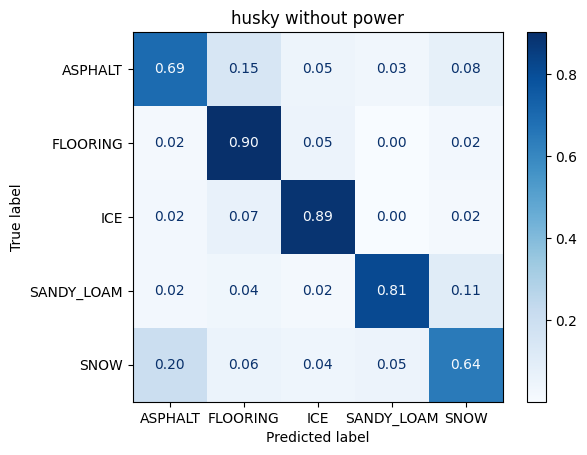

In [4]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    normalize="true",
    values_format=".2f",
    cmap="Blues",
)
disp.ax_.set_title(f"{results_dir.stem} without power")

Text(0.5, 1.0, 'husky')

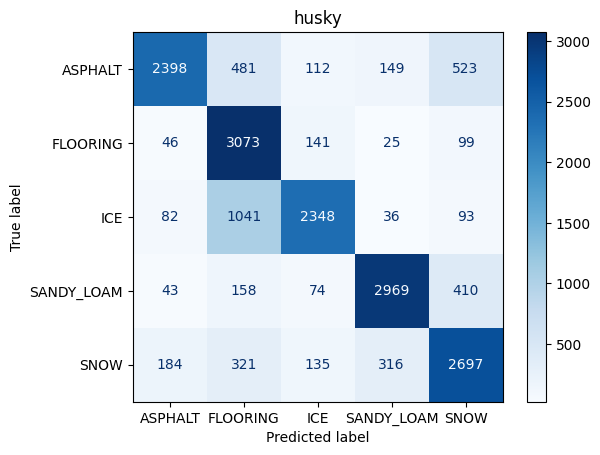

In [5]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem)

In [6]:
metrics = pd.Series(
    {
        "accuracy": accuracy_score(
            ytest,
            ypred,
        ),
        "precision": precision_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "recall": recall_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "f1-score": f1_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
    }
)

/home/norlab/code/iros2024/Vulpi2021-terrain-deep-learning/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/norlab/code/iros2024/Vulpi2021-terrain-deep-learning/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/norlab/code/iros2024/Vulpi2021-terrain-deep-learning/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` 

In [7]:
metrics

accuracy                      0.751086
precision    [0.0, 0.0, 0.0, 0.0, 0.0]
recall       [0.0, 0.0, 0.0, 0.0, 0.0]
f1-score     [0.0, 0.0, 0.0, 0.0, 0.0]
dtype: object